# Data Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('customer_data.xlsx')
data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


In [3]:
missing_values = data.isnull().sum()
print("Missing values:")
missing_values

Missing values:


CustomerID                  0
Gender                      0
Age                         0
Income                      5
City                        3
Region                      0
Frequency_of_Purchases      0
Average_Purchase_Amount     0
Customer_Lifespan_Months    0
Purchase_Channel            0
Date_of_Purchase            0
Churn_Status                0
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer

In [5]:
imputer = SimpleImputer(strategy = 'median')
imputer.fit(data[['Income']])
data[['Income']] = imputer.transform(data[['Income']])

In [6]:
imputer_2 = SimpleImputer(strategy = 'most_frequent')
imputer_2.fit(data[['City']])
data[['City']] = imputer_2.transform(data[['City']])

In [7]:
missing_values = data.isnull().sum()
print("Missing values:")
missing_values

Missing values:


CustomerID                  0
Gender                      0
Age                         0
Income                      0
City                        0
Region                      0
Frequency_of_Purchases      0
Average_Purchase_Amount     0
Customer_Lifespan_Months    0
Purchase_Channel            0
Date_of_Purchase            0
Churn_Status                0
dtype: int64

In [8]:
data.dtypes

CustomerID                   object
Gender                       object
Age                           int64
Income                      float64
City                         object
Region                       object
Frequency_of_Purchases        int64
Average_Purchase_Amount     float64
Customer_Lifespan_Months     object
Purchase_Channel             object
Date_of_Purchase             object
Churn_Status                 object
dtype: object

In [9]:
unique_values = data['Customer_Lifespan_Months'].unique()
unique_values

array([3, 4, 1, 2, 5, 'XXXX'], dtype=object)

In [10]:
data = data[data['Customer_Lifespan_Months'] != 'XXXX']

In [11]:
data['Customer_Lifespan_Months'].unique()

array([3, 4, 1, 2, 5], dtype=object)

In [12]:
data['Customer_Lifespan_Months'] = data['Customer_Lifespan_Months'].astype(int)

In [13]:
data['Date_of_Purchase'] = data['Date_of_Purchase'].astype('datetime64')

In [14]:
data.dtypes

CustomerID                          object
Gender                              object
Age                                  int64
Income                             float64
City                                object
Region                              object
Frequency_of_Purchases               int64
Average_Purchase_Amount            float64
Customer_Lifespan_Months             int64
Purchase_Channel                    object
Date_of_Purchase            datetime64[ns]
Churn_Status                        object
dtype: object

In [15]:
data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


In [16]:
duplicates = data.duplicated()
data[duplicates]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
80,C021,Female,22,41743.0,Los Angeles,Northeast,4,54.599,1,Online,2023-06-08,No


In [17]:
data.drop_duplicates(inplace = True)

In [18]:
duplicates = data.duplicated()
data[duplicates]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status


# Sorting and Filtering

In [19]:
sorted_data = data.sort_values(by = 'Income', ascending = False)
sorted_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
55,C056,Female,29,107662.0,Houston,Northeast,3,47.877,1,In-store,2022-02-11,No
22,C023,Female,41,105186.0,Los Angeles,Midwest,14,137.697,4,Online,2023-07-15,Yes
70,C071,Female,36,103264.0,Los Angeles,Northeast,11,117.394,3,Online,2023-12-22,Yes
32,C033,Female,31,98590.0,Houston,West,7,76.114,2,Online,2023-06-30,No
52,C053,Female,45,90860.0,Houston,Northeast,10,105.287,3,In-store,2023-12-29,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
14,C015,Male,44,32500.0,New York,Northeast,9,96.473,3,Online,2023-03-30,No
49,C050,Female,39,29104.0,Houston,Midwest,7,84.461,2,Online,2022-03-17,No
10,C011,Female,53,27958.0,Los Angeles,Midwest,10,98.449,3,In-store,2023-07-16,Yes
23,C024,Male,54,27660.0,New York,Midwest,12,125.763,3,Online,2023-07-11,Yes


In [20]:
male_data = data[data['Gender'] == 'Male']
male_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
7,C008,Male,38,38401.0,Houston,West,6,70.730,2,Online,2022-05-24,No
8,C009,Male,44,73105.0,Los Angeles,Northeast,12,124.887,3,Online,2022-09-02,Yes
14,C015,Male,44,32500.0,New York,Northeast,9,96.473,3,Online,2023-03-30,No
15,C016,Male,37,59214.0,Houston,Midwest,10,108.902,3,Online,2022-01-02,Yes
17,C018,Male,39,86730.0,New York,Midwest,11,118.579,3,Online,2022-03-06,Yes


In [21]:
male_fre_data = male_data[male_data['Frequency_of_Purchases'] > 5]
male_fre_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
7,C008,Male,38,38401.0,Houston,West,6,70.730,2,Online,2022-05-24,No
8,C009,Male,44,73105.0,Los Angeles,Northeast,12,124.887,3,Online,2022-09-02,Yes
14,C015,Male,44,32500.0,New York,Northeast,9,96.473,3,Online,2023-03-30,No
15,C016,Male,37,59214.0,Houston,Midwest,10,108.902,3,Online,2022-01-02,Yes
17,C018,Male,39,86730.0,New York,Midwest,11,118.579,3,Online,2022-03-06,Yes
18,C019,Male,32,41111.0,Los Angeles,West,14,133.229,4,Online,2023-07-19,Yes
19,C020,Male,28,37050.0,Los Angeles,Midwest,6,71.789,2,Online,2022-04-08,No


In [22]:
churned_male_freq = male_fre_data.query('Churn_Status == "Yes"')
churned_male_freq

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
8,C009,Male,44,73105.0,Los Angeles,Northeast,12,124.887,3,Online,2022-09-02,Yes
15,C016,Male,37,59214.0,Houston,Midwest,10,108.902,3,Online,2022-01-02,Yes
17,C018,Male,39,86730.0,New York,Midwest,11,118.579,3,Online,2022-03-06,Yes
18,C019,Male,32,41111.0,Los Angeles,West,14,133.229,4,Online,2023-07-19,Yes
23,C024,Male,54,27660.0,New York,Midwest,12,125.763,3,Online,2023-07-11,Yes
24,C025,Male,27,45239.0,Los Angeles,West,12,127.888,3,In-store,2022-04-04,Yes
33,C034,Male,53,78203.0,Houston,Northeast,12,130.277,3,In-store,2023-06-05,Yes
38,C039,Male,43,51799.0,Houston,West,14,133.540,4,Online,2022-10-26,Yes


In [23]:
churned_male_freq_city = churned_male_freq[churned_male_freq['City'].isin(['Chicago', 'Houston'])]
churned_male_freq_city

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
15,C016,Male,37,59214.0,Houston,Midwest,10,108.902,3,Online,2022-01-02,Yes
33,C034,Male,53,78203.0,Houston,Northeast,12,130.277,3,In-store,2023-06-05,Yes
38,C039,Male,43,51799.0,Houston,West,14,133.540,4,Online,2022-10-26,Yes
41,C042,Male,53,52616.0,Houston,Northeast,11,120.311,3,Online,2022-07-15,Yes
42,C043,Male,44,66344.0,Chicago,Midwest,12,130.562,3,In-store,2023-05-17,Yes
45,C046,Male,44,59154.0,Chicago,West,15,152.291,4,Online,2022-12-07,Yes
63,C064,Male,30,58033.0,Houston,West,10,107.919,3,In-store,2023-11-16,Yes
66,C067,Male,54,58033.0,Houston,West,12,128.255,3,Online,2022-03-24,Yes


In [24]:
data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


In [25]:
data.loc[0:4, 'CustomerID':'Region']

,CustomerID,Gender,Age,Income,City,Region
0,C001,Male,49,72504.0,Chicago,Northeast
1,C002,Female,38,40881.0,New York,West
2,C003,Male,17,63333.0,New York,Northeast
3,C004,Male,34,58030.0,Chicago,Midwest
4,C005,Male,30,78889.0,Houston,Midwest


In [26]:
data.iloc[0:5, 0:6]

,CustomerID,Gender,Age,Income,City,Region
0,C001,Male,49,72504.0,Chicago,Northeast
1,C002,Female,38,40881.0,New York,West
2,C003,Male,17,63333.0,New York,Northeast
3,C004,Male,34,58030.0,Chicago,Midwest
4,C005,Male,30,78889.0,Houston,Midwest


In [27]:
data[(data['Customer_Lifespan_Months'] >= 2) & (data['Customer_Lifespan_Months'] <= 5)]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,9.824100e+01,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,1.576400e+02,4,In-store,2023-07-08,Yes
5,C006,Male,52,76470.0,Chicago,Midwest,11,1.170120e+02,3,Online,2022-11-30,Yes
6,C007,Female,35,60349.0,Houston,Northeast,9,9.554400e+01,2,In-store,2023-07-20,No
7,C008,Male,38,38401.0,Houston,West,6,7.073000e+01,2,Online,2022-05-24,No
...,...,...,...,...,...,...,...,...,...,...,...,...
72,C073,Male,28,73631.0,Los Angeles,West,9,9.034400e+01,2,In-store,2022-11-20,No
75,C076,Male,44,59659.0,Houston,Midwest,14,1.345400e+02,4,Online,2023-12-25,Yes
77,C078,Male,30,76887.0,Houston,Midwest,7,8.081600e+01,2,Online,2022-11-14,No
78,C079,Female,42,56569.0,New York,West,11,1.342341e+07,3,In-store,2022-12-08,Yes


# Joining Data

In [28]:
data2 = pd.read_excel('performance_data.xlsx')
data2.head()

,CustomerID,Recency,Frequency_Score,Monetary_Score
0,C001,3,2,2
1,C002,3,3,3
2,C003,4,4,4
3,C004,2,2,2
4,C005,1,1,1


In [29]:
joined_data = pd.merge(data, data2, on = 'CustomerID', how = 'inner')
joined_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No,1,1,1


In [30]:
joined_data.shape

(79, 15)

In [31]:
additional_data = pd.read_excel('additional_data.xlsx')
additional_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,CustomerID.1,Recency,Frequency_Score,Monetary_Score
0,C081,Male,37,50728,Chicago,West,11,75.757,2,In-store,2023-09-10,Yes,C081,2,2,1
1,C082,Female,48,69629,Los Angeles,Midwest,9,78.433,4,In-store,2023-07-15,No,C082,3,4,4
2,C083,Male,28,29184,Chicago,Northeast,7,82.794,3,Online,2023-08-25,Yes,C083,3,1,2
3,C084,Female,33,61265,Los Angeles,West,15,88.490,2,Online,2022-10-22,Yes,C084,4,1,3
4,C085,Female,30,63130,Houston,Midwest,13,108.749,3,Online,2023-04-01,Yes,C085,4,4,1


In [32]:
final_data = (pd.concat([joined_data, additional_data])).reset_index(drop = True)
final_data.tail()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,CustomerID.1
94,C096,Male,32,18600.0,Chicago,Northeast,12,123.003,4,Online,2022-02-03,Yes,4,2,3,C096
95,C097,Male,38,68525.0,Chicago,West,13,106.526,4,Online,2023-09-20,Yes,4,3,3,C097
96,C098,Female,24,73538.0,Houston,West,3,162.533,1,In-store,2023-11-04,Yes,2,1,1,C098
97,C099,Female,20,47251.0,Chicago,Midwest,5,145.404,2,In-store,2022-09-24,No,4,3,1,C099
98,C100,Male,39,52054.0,Chicago,Midwest,14,36.975,2,In-store,2023-05-03,No,1,4,4,C100


In [33]:
final_data = final_data.drop('CustomerID.1', axis = 1)
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1


# Data Analysis

In [34]:
freq_purchase_channel = final_data['Purchase_Channel'].value_counts()
freq_purchase_channel

Online      65
In-store    34
Name: Purchase_Channel, dtype: int64

In [35]:
perc_purchase_channel = freq_purchase_channel/len(final_data['Purchase_Channel'])*100
perc_purchase_channel

Online      65.656566
In-store    34.343434
Name: Purchase_Channel, dtype: float64

In [36]:
round(final_data.describe())

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score
count,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
mean,35.0,58115.0,9.0,135687.0,3.0,3.0,3.0,3.0
std,10.0,18618.0,3.0,1349094.0,1.0,1.0,1.0,1.0
min,17.0,15531.0,1.0,37.0,0.0,1.0,1.0,1.0
25%,28.0,45724.0,7.0,76.0,2.0,2.0,2.0,2.0
50%,35.0,58033.0,10.0,98.0,3.0,3.0,3.0,3.0
75%,42.0,71484.0,12.0,121.0,3.0,4.0,4.0,4.0
max,54.0,107662.0,16.0,13423412.0,5.0,4.0,4.0,4.0


In [37]:
final_data = final_data[final_data['Average_Purchase_Amount'] != 13423411.958]

In [38]:
round(final_data.describe())

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score
count,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0
mean,35.0,58131.0,9.0,98.0,3.0,3.0,3.0,3.0
std,10.0,18713.0,3.0,29.0,1.0,1.0,1.0,1.0
min,17.0,15531.0,1.0,37.0,0.0,1.0,1.0,1.0
25%,28.0,45482.0,7.0,76.0,2.0,2.0,2.0,2.0
50%,35.0,58033.0,10.0,97.0,3.0,3.0,3.0,3.0
75%,42.0,71994.0,12.0,120.0,3.0,4.0,4.0,4.0
max,54.0,107662.0,16.0,193.0,5.0,4.0,4.0,4.0


In [39]:
city_purchase_amount = final_data.groupby('City')['Average_Purchase_Amount'].median()
city_purchase_amount

City
Chicago        102.1860
Houston         87.6615
Los Angeles    100.7250
New York        94.4690
Name: Average_Purchase_Amount, dtype: float64

In [40]:
pivot_table = final_data.pivot_table(index = 'Churn_Status', 
                                     values = ['Recency', 'Frequency_Score', 'Monetary_Score'], 
                                     aggfunc = {'Recency':'mean', 'Frequency_Score':'mean', 'Monetary_Score':'mean', 'Churn_Status':'count'})

In [41]:
pivot_table = pivot_table.rename(columns = {'Churn_Status':'Freq_churn', 
                                            'Recency':'Mean_recency', 
                                            'Frequency_Score':'Mean_FS', 'Monetary_Score':'Mean_MS'})

In [42]:
pivot_table

,Freq_churn,Mean_FS,Mean_MS,Mean_recency
Churn_Status,,,,
No,43,2.744186,2.558140,2.720930
Yes,55,2.509091,2.509091,2.618182


In [43]:
cross_tab = pd.crosstab(final_data['City'], final_data['Churn_Status'])
cross_tab

Churn_Status,No,Yes
City,,
Chicago,8,17
Houston,16,16
Los Angeles,10,14
New York,9,8


In [44]:
num_variables = final_data.select_dtypes(include = ['number']).columns

In [45]:
num_variables

Index(['Age', 'Income', 'Frequency_of_Purchases', 'Average_Purchase_Amount',
       'Customer_Lifespan_Months', 'Recency', 'Frequency_Score',
       'Monetary_Score'],
      dtype='object')

In [46]:
correl = round(final_data[num_variables].corr(), 3)
correl

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score
Age,1.000,0.110,0.301,0.170,0.334,-0.048,-0.006,0.065
Income,0.110,1.000,-0.022,0.023,0.068,0.178,0.163,0.162
Frequency_of_Purchases,0.301,-0.022,1.000,0.704,0.762,-0.063,-0.065,-0.066
Average_Purchase_Amount,0.170,0.023,0.704,1.000,0.690,-0.029,-0.145,-0.191
Customer_Lifespan_Months,0.334,0.068,0.762,0.690,1.000,-0.073,-0.013,-0.001
Recency,-0.048,0.178,-0.063,-0.029,-0.073,1.000,0.761,0.743
Frequency_Score,-0.006,0.163,-0.065,-0.145,-0.013,0.761,1.000,0.819
Monetary_Score,0.065,0.162,-0.066,-0.191,-0.001,0.743,0.819,1.000


# Data Visualisation

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

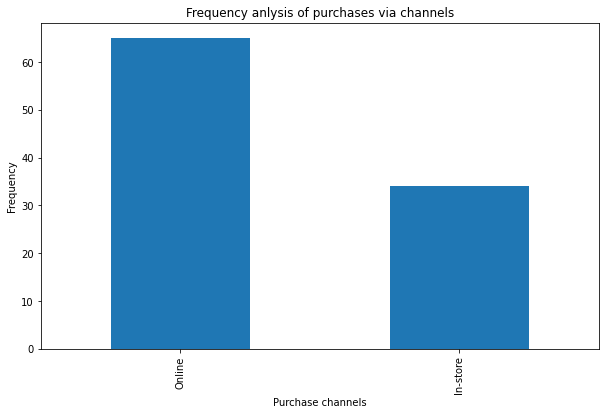

In [48]:
plt.figure(figsize = (10, 6))
freq_purchase_channel.plot(kind = 'bar')
plt.title('Frequency anlysis of purchases via channels')
plt.xlabel('Purchase channels')
plt.ylabel('Frequency')
plt.show()

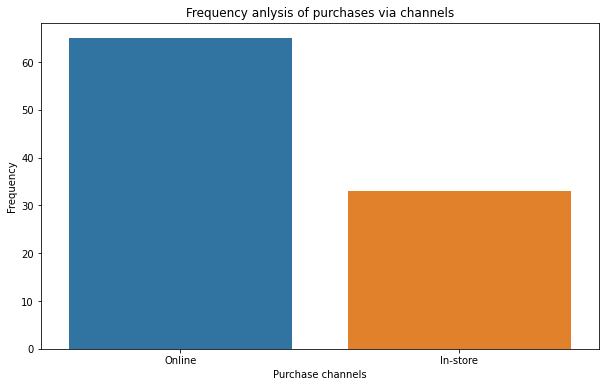

In [49]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Purchase_Channel', data = final_data)
plt.title('Frequency anlysis of purchases via channels')
plt.xlabel('Purchase channels')
plt.ylabel('Frequency')
plt.show()

<Figure size 720x432 with 0 Axes>

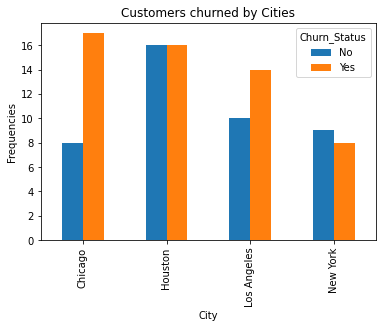

In [50]:
plt.figure(figsize = (10, 6))
cross_tab.plot(kind = 'bar', stacked = False)
plt.title('Customers churned by Cities')
plt.xlabel('City')
plt.ylabel('Frequencies')
plt.show()

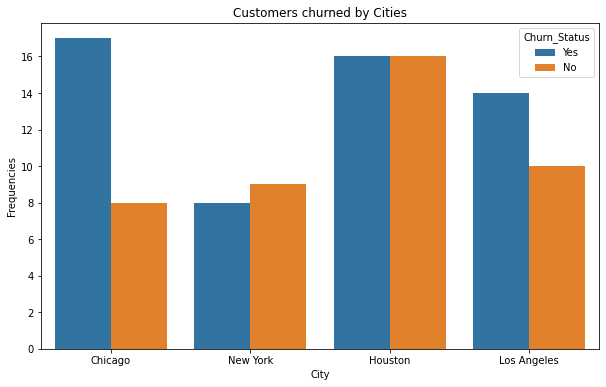

In [51]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'City', hue = 'Churn_Status', data = final_data)
plt.title('Customers churned by Cities')
plt.xlabel('City')
plt.ylabel('Frequencies')
plt.show()

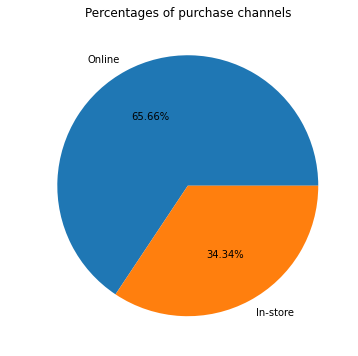

In [52]:
plt.figure(figsize = (10, 6))
perc_purchase_channel.plot(kind = 'pie', autopct = '%1.2f%%')
plt.title('Percentages of purchase channels')
plt.ylabel(' ')
plt.show()

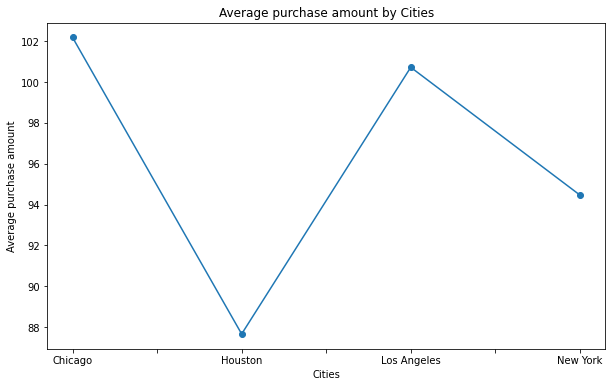

In [53]:
plt.figure(figsize = (10, 6))
city_purchase_amount.plot(kind = 'line', marker = 'o')
plt.title('Average purchase amount by Cities')
plt.xlabel('Cities')
plt.ylabel('Average purchase amount')
plt.show()

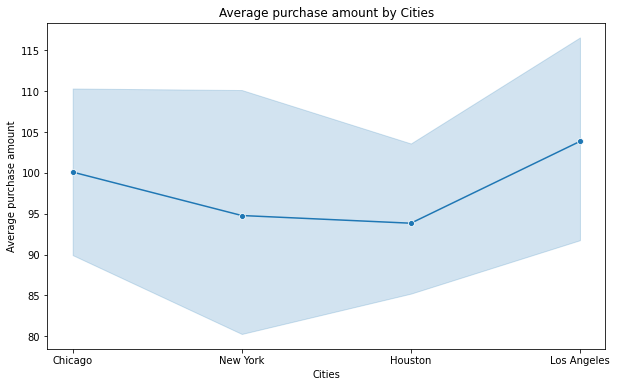

In [54]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'City', y = 'Average_Purchase_Amount', data = final_data, marker = 'o')
plt.title('Average purchase amount by Cities')
plt.xlabel('Cities')
plt.ylabel('Average purchase amount')
plt.show()

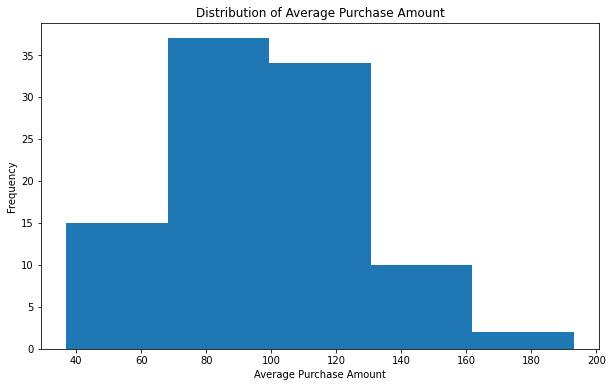

In [55]:
plt.figure(figsize = (10, 6))
final_data['Average_Purchase_Amount'].plot(kind = 'hist', bins = 5)
plt.title('Distribution of Average Purchase Amount')
plt.xlabel('Average Purchase Amount')
plt.ylabel('Frequency')
plt.show()

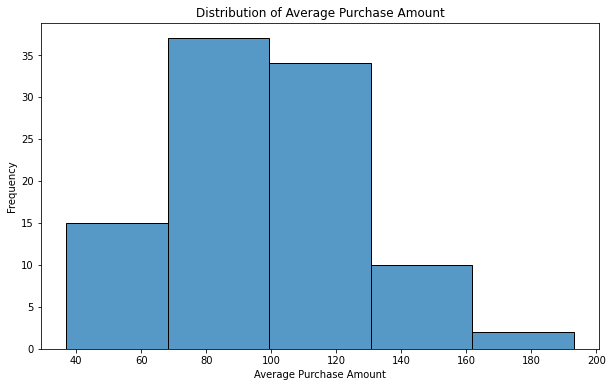

In [56]:
plt.figure(figsize = (10, 6))
sns.histplot(final_data['Average_Purchase_Amount'], bins = 5)
plt.title('Distribution of Average Purchase Amount')
plt.xlabel('Average Purchase Amount')
plt.ylabel('Frequency')
plt.show()

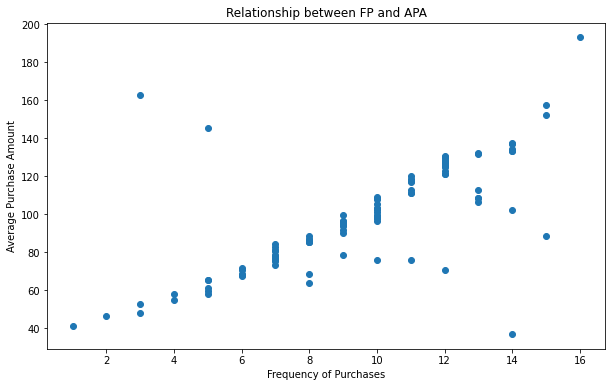

In [57]:
plt.figure(figsize = (10, 6))
plt.scatter(final_data['Frequency_of_Purchases'], final_data['Average_Purchase_Amount'])
plt.title('Relationship between FP and APA')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Average Purchase Amount')
plt.show()

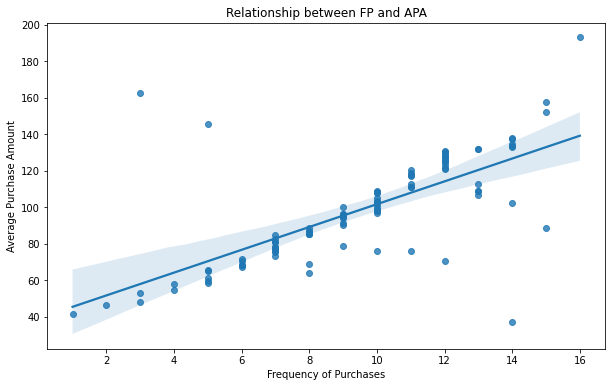

In [58]:
plt.figure(figsize = (10, 6))
sns.regplot(x = 'Frequency_of_Purchases', y = 'Average_Purchase_Amount', data = final_data)
plt.title('Relationship between FP and APA')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Average Purchase Amount')
plt.show()

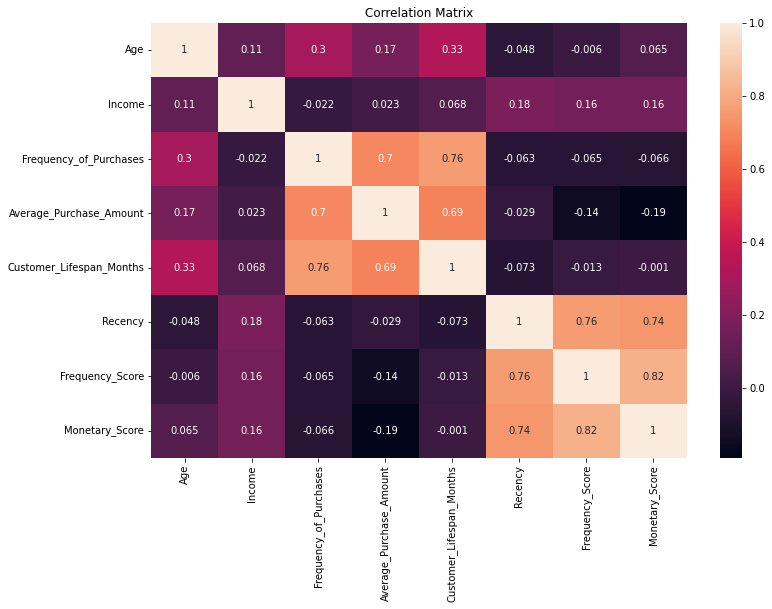

In [59]:
plt.figure(figsize = (12, 8))
sns.heatmap(correl, annot = True)
plt.title('Correlation Matrix')
plt.show()

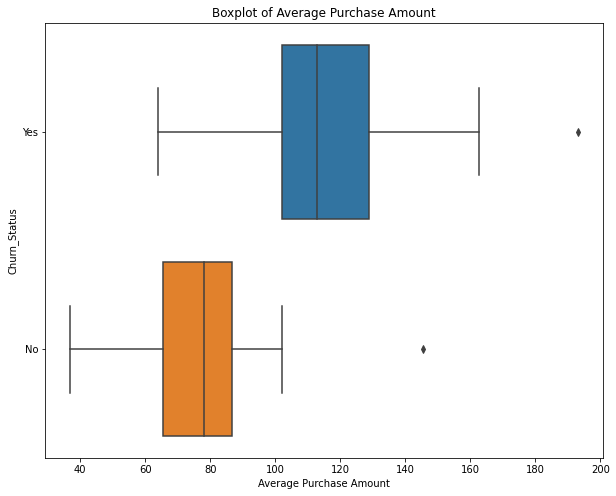

In [60]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'Average_Purchase_Amount', y = 'Churn_Status', data = final_data)
plt.title('Boxplot of Average Purchase Amount')
plt.xlabel('Average Purchase Amount')
plt.show()

# Data Transformation

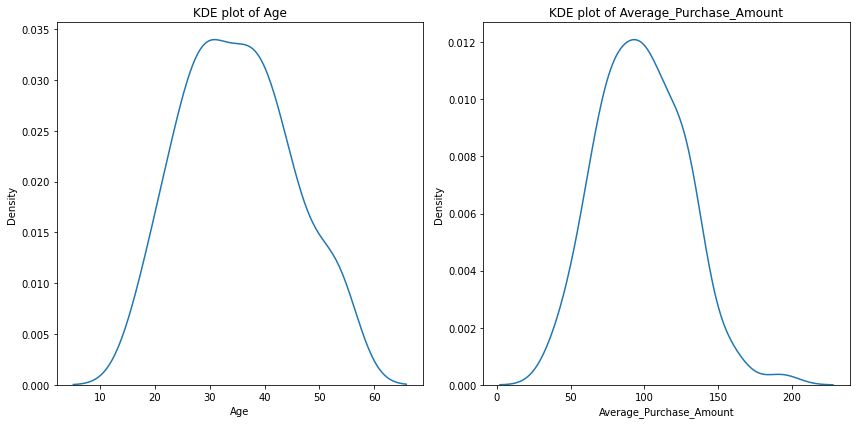

In [61]:
numeric_columns = ['Age', 'Average_Purchase_Amount']

fig, axes = plt.subplots(1, 2, figsize = (12, 6))

for index, column in enumerate(numeric_columns):
    sns.kdeplot(final_data[column], ax = axes[index])
    axes[index].set_title(f'KDE plot of {column}')
    
plt.tight_layout()
plt.show()

In [62]:
from scipy.stats import shapiro

shapiro_results = {}

for column in numeric_columns:
    stat, p_value = shapiro(final_data[column])
    shapiro_results[column] = round(p_value, 3)
    
shapiro_results

{'Age': 0.037, 'Average_Purchase_Amount': 0.487}

In [63]:
import numpy as np

In [64]:
def sqrt_transformation(data, column_name):
    data[f'{column_name}_sqrt'] = np.sqrt(data[column_name])
    stat, p_value = shapiro(data[f'{column_name}_sqrt'])
    kdeplot = sns.kdeplot(data[f'{column_name}_sqrt'])
    
    print(kdeplot)
    print('P value: ', p_value)

AxesSubplot(0.125,0.125;0.775x0.755)
P value:  0.09854146093130112


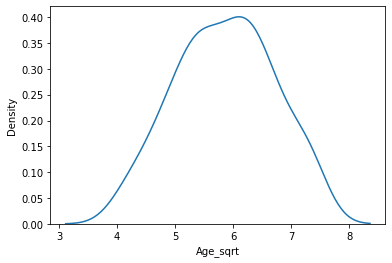

In [65]:
sqrt_transformation(final_data, 'Age')

In [66]:
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226


In [67]:
def log_transformation(data, column_name):
    data[f'{column_name}_log'] = np.log(data[column_name])
    stat, p_value = shapiro(data[f'{column_name}_log'])
    kdeplot = sns.kdeplot(data[f'{column_name}_log'])
    
    print(kdeplot)
    print('P_value: ', p_value)

AxesSubplot(0.125,0.125;0.775x0.755)
P_value:  0.03301098570227623


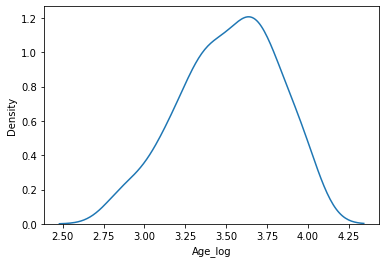

In [68]:
log_transformation(final_data, 'Age')

In [69]:
final_data = final_data.drop('Age_log', axis = 1)
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226


In [70]:
from scipy.stats import boxcox

def boxcox_transformation(data, column_name):
    transformed_data, _ = boxcox(data[column_name])
    data[f'{column_name}_boxcox'] = transformed_data
    stat, p_value = shapiro(data[f'{column_name}_boxcox'])
    kdeplot = sns.kdeplot(data[f'{column_name}_boxcox'])
    
    print(kdeplot)
    print('P value: ', p_value)

AxesSubplot(0.125,0.125;0.775x0.755)
P value:  0.09806650131940842


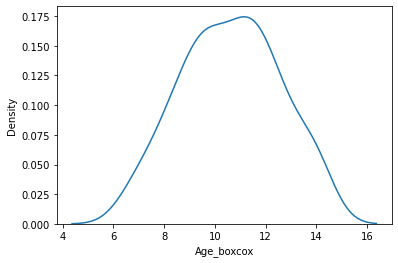

In [71]:
boxcox_transformation(final_data, 'Age')

In [72]:
from scipy.stats import yeojohnson

def yeojohnson_transformation(data, column_name):
    transformed_data, _ = yeojohnson(data[column_name])
    data[f'{column_name}_yeojohnson'] = transformed_data
    stat, p_value = shapiro(data[f'{column_name}_yeojohnson'])
    kdeplot = sns.kdeplot(data[f'{column_name}_yeojohnson'])
    
    print(kdeplot)
    print('P value: ', p_value)

AxesSubplot(0.125,0.125;0.775x0.755)
P value:  0.09733053296804428


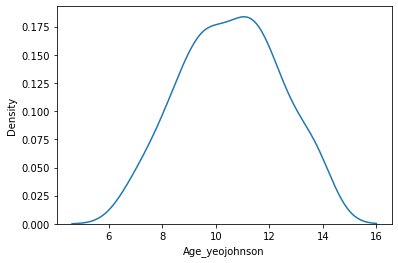

In [73]:
yeojohnson_transformation(final_data, 'Age')

In [74]:
preprocessed_data = final_data.drop(['Age', 'Age_boxcox', 'Age_yeojohnson'], axis = 1)
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226


# Statistical Analysis

In [75]:
from scipy import stats

hypothesized_mean = 68

t_stat, p_value = stats.ttest_1samp(preprocessed_data['Average_Purchase_Amount'], hypothesized_mean)
print("P value: ", p_value)

if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

P value:  3.765882799621164e-17
Reject the null hypothesis


In [76]:
churned_customers = preprocessed_data.query('Churn_Status == "Yes"')['Average_Purchase_Amount']
existing_customers = preprocessed_data.query('Churn_Status == "No"')['Average_Purchase_Amount']

t_stat, p_value = stats.ttest_ind(churned_customers, existing_customers)
print("P value:", p_value)

if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

P value: 1.077550720319448e-13
Reject the null hypothesis


In [77]:
churned_customers.mean()

114.96134545454547

In [78]:
existing_customers.mean()

76.42560465116279

In [79]:
stat, p_value = shapiro(preprocessed_data['Frequency_of_Purchases'])
print(p_value)

0.11246279627084732


In [80]:
chicago_cust = preprocessed_data.query('City == "Chicago"')['Frequency_of_Purchases']
newyork_cust = preprocessed_data.query('City == "New York"')['Frequency_of_Purchases']
houston_cust = preprocessed_data.query('City == "Houston"')['Frequency_of_Purchases']
losangeles_cust = preprocessed_data.query('City == "Los Angeles"')['Frequency_of_Purchases']

Test_stat, p_value = stats.f_oneway(chicago_cust, newyork_cust, houston_cust, losangeles_cust)
print("P value: ", p_value)

if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

P value:  0.0937561908706892
Fail to reject the null hypothesis


In [81]:
from scipy.stats import levene

stats, p_value = levene(chicago_cust, newyork_cust, houston_cust, losangeles_cust)
print('P value: ', p_value)

P value:  0.500791837582151


In [82]:
from scipy.stats import chi2_contingency

cross_tab = pd.crosstab(preprocessed_data['Purchase_Channel'], preprocessed_data['Region'])

chi2, p_value, dof, expected = chi2_contingency(cross_tab)
print(" P value :", p_value)

if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

 P value : 0.628361041713461
Fail to reject the null hypothesis


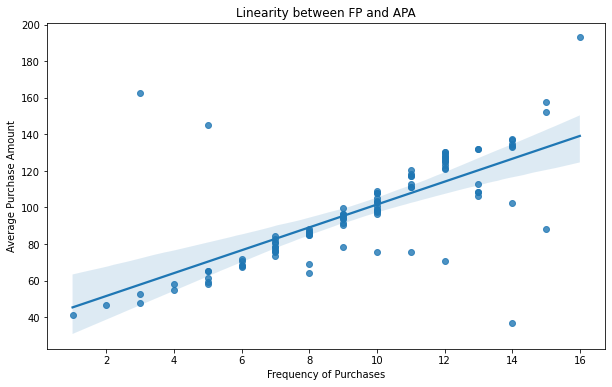

In [83]:
plt.figure(figsize = (10, 6))
sns.regplot(x = 'Frequency_of_Purchases', y = 'Average_Purchase_Amount', data = preprocessed_data)
plt.title('Linearity between FP and APA')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Average Purchase Amount')
plt.show()

In [84]:
from scipy.stats import pearsonr

purchase_frequency = preprocessed_data['Frequency_of_Purchases']
purchase_amount = preprocessed_data['Average_Purchase_Amount']

corr, p_value = pearsonr(purchase_frequency, purchase_amount)
print("Correlation coefficient: ", corr)
print("P value: ", p_value)

if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Correlation coefficient:  0.703991150113003
P value:  6.176786543554791e-16
Reject the null hypothesis


In [85]:
import statsmodels.api as sm

x = preprocessed_data['Frequency_of_Purchases']
y = preprocessed_data['Average_Purchase_Amount']

x_constant = sm.add_constant(x)
model = sm.OLS(y, x_constant).fit()

print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Average_Purchase_Amount   R-squared:                       0.496
Model:                                 OLS   Adj. R-squared:                  0.490
Method:                      Least Squares   F-statistic:                     94.33
Date:                     Tue, 16 Apr 2024   Prob (F-statistic):           6.18e-16
Time:                             22:33:47   Log-Likelihood:                -435.04
No. Observations:                       98   AIC:                             874.1
Df Residuals:                           96   BIC:                             879.3
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [86]:
predicted_APA = 39.0765 + (6.2551 * 70)
predicted_APA

476.9335

# Feature engineering

In [87]:
preprocessed_data['Customer_value'] = preprocessed_data['Frequency_of_Purchases'] * preprocessed_data['Average_Purchase_Amount']

In [88]:
preprocessed_data['CLV'] = preprocessed_data['Customer_value'] * preprocessed_data['Customer_Lifespan_Months']

In [89]:
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value,CLV
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000,982.410,2947.230
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414,2364.600,9458.400
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106,41.252,41.252
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952,403.974,403.974
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226,158.289,158.289


In [90]:
preprocessed_data['Date_of_Purchase'] = preprocessed_data['Date_of_Purchase'].astype('datetime64')

preprocessed_data['Year'] = preprocessed_data['Date_of_Purchase'].dt.year
preprocessed_data['Month'] = preprocessed_data['Date_of_Purchase'].dt.month
preprocessed_data['Day'] = preprocessed_data['Date_of_Purchase'].dt.day

In [91]:
preprocessed_data = preprocessed_data.drop('Date_of_Purchase', axis = 1)
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value,CLV,Year,Month,Day
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,Yes,3,2,2,7.000000,982.410,2947.230,2022,3,5
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,Yes,3,3,3,6.164414,2364.600,9458.400,2023,7,8
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,No,4,4,4,4.123106,41.252,41.252,2023,1,30
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,No,2,2,2,5.830952,403.974,403.974,2023,6,1
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,No,1,1,1,5.477226,158.289,158.289,2022,9,23


In [92]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
preprocessed_data['Churn_Status'] = encoder.fit_transform(preprocessed_data['Churn_Status'])
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value,CLV,Year,Month,Day
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,1,3,2,2,7.000000,982.410,2947.230,2022,3,5
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,1,3,3,3,6.164414,2364.600,9458.400,2023,7,8
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,0,4,4,4,4.123106,41.252,41.252,2023,1,30
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,0,2,2,2,5.830952,403.974,403.974,2023,6,1
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,0,1,1,1,5.477226,158.289,158.289,2022,9,23


In [93]:
preprocessed_data['engagement_level'] = pd.cut(preprocessed_data['Customer_Lifespan_Months'], 
                                              bins = [0, 2, 3, 5], 
                                              labels = ['Low engaged', 'Moderately engaged', 'Highly engaged'], 
                                              include_lowest = True)
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value,CLV,Year,Month,Day,engagement_level
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,1,3,2,2,7.000000,982.410,2947.230,2022,3,5,Moderately engaged
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,1,3,3,3,6.164414,2364.600,9458.400,2023,7,8,Highly engaged
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,0,4,4,4,4.123106,41.252,41.252,2023,1,30,Low engaged
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,0,2,2,2,5.830952,403.974,403.974,2023,6,1,Low engaged
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,0,1,1,1,5.477226,158.289,158.289,2022,9,23,Low engaged


In [94]:
mapping = {'Low engaged':1, 'Moderately engaged': 2, 'Highly engaged': 3}
preprocessed_data['engagement_level'] = preprocessed_data['engagement_level'].map(mapping)
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value,CLV,Year,Month,Day,engagement_level
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,1,3,2,2,7.000000,982.410,2947.230,2022,3,5,2
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,1,3,3,3,6.164414,2364.600,9458.400,2023,7,8,3
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,0,4,4,4,4.123106,41.252,41.252,2023,1,30,1
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,0,2,2,2,5.830952,403.974,403.974,2023,6,1,1
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,0,1,1,1,5.477226,158.289,158.289,2022,9,23,1


In [95]:
dummies = pd.get_dummies(preprocessed_data[['Gender', 'City', 'Region', 'Purchase_Channel']])
processed_data = pd.concat([preprocessed_data, dummies], axis = 1)

processed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,...,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_New York,Region_Midwest,Region_Northeast,Region_West,Purchase_Channel_In-store,Purchase_Channel_Online
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,1,...,1,1,0,0,0,0,1,0,0,1
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,1,...,0,0,0,0,1,0,0,1,1,0
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,0,...,1,0,0,0,1,0,1,0,0,1
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,0,...,1,1,0,0,0,1,0,0,1,0
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,0,...,1,0,1,0,0,1,0,0,0,1


# ML Preprocessing

In [96]:
processed_data.columns

Index(['CustomerID', 'Gender', 'Income', 'City', 'Region',
       'Frequency_of_Purchases', 'Average_Purchase_Amount',
       'Customer_Lifespan_Months', 'Purchase_Channel', 'Churn_Status',
       'Recency', 'Frequency_Score', 'Monetary_Score', 'Age_sqrt',
       'Customer_value', 'CLV', 'Year', 'Month', 'Day', 'engagement_level',
       'Gender_Female', 'Gender_Male', 'City_Chicago', 'City_Houston',
       'City_Los Angeles', 'City_New York', 'Region_Midwest',
       'Region_Northeast', 'Region_West', 'Purchase_Channel_In-store',
       'Purchase_Channel_Online'],
      dtype='object')

In [97]:
x_reg = processed_data.drop(['CustomerID', 'Gender', 'City', 'Region', 'Purchase_Channel', 'CLV'], axis = 1)
y_reg = processed_data['CLV']

In [98]:
x_class = processed_data.drop(['CustomerID', 'Gender', 'City', 'Region', 'Purchase_Channel', 'Churn_Status'], axis = 1)
y_class = processed_data['Churn_Status']

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x_reg = scaler.fit_transform(x_reg)

In [100]:
scaled_x_reg

array([[ 0.77203698,  0.1759198 ,  0.0065207 , ..., -0.72886899,
        -0.7125253 ,  0.7125253 ],
       [-0.92657088,  1.71521804,  2.06462675, ...,  1.37198868,
         1.40345893, -1.40345893],
       [ 0.27942297, -2.59481703, -1.96808166, ..., -0.72886899,
        -0.7125253 ,  0.7125253 ],
       ...,
       [ 0.82757758, -1.97909774,  2.23416349, ...,  1.37198868,
         1.40345893, -1.40345893],
       [-0.58441068, -1.36337844,  1.64066362, ..., -0.72886899,
         1.40345893, -1.40345893],
       [-0.32642081,  1.40735839, -2.11627472, ..., -0.72886899,
         1.40345893, -1.40345893]])

In [101]:
from sklearn.preprocessing import MinMaxScaler

scaler_2 = MinMaxScaler()
scaled_x_class = (scaler_2.fit_transform(x_class)).round()

In [102]:
scaled_x_class

array([[1., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [103]:
from sklearn.model_selection import train_test_split

x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(scaled_x_reg, y_reg, 
                                                                   test_size = 0.2, random_state = 42)

In [104]:
x_reg_test.shape

(20, 25)

In [105]:
x_class_train, x_class_test, y_class_train, y_class_test = train_test_split(scaled_x_class, y_class, 
                                                                   test_size = 0.2, random_state = 42)

In [106]:
x_class_train.shape

(78, 25)

In [107]:
from sklearn.decomposition import PCA

pca = PCA()
temp_pca = pca.fit_transform(x_reg)
evr = pca.explained_variance_ratio_

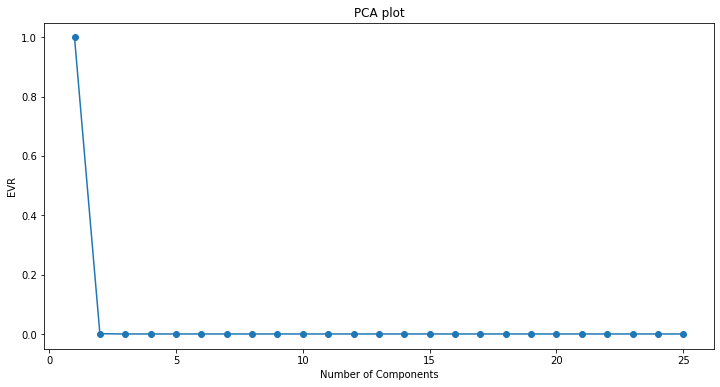

In [108]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, len(evr)+1), evr, marker = 'o')
plt.title('PCA plot')
plt.xlabel('Number of Components')
plt.ylabel('EVR')
plt.show()

In [109]:
pca = PCA(n_components = 1)
x_reg_pca = pca.fit_transform(x_reg)

# Predictive Analytics

# Regression ML models

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(x_reg_train, y_reg_train)

y_lr_pred = lr_model.predict(x_reg_test)

mse_lr = mean_squared_error(y_reg_test, y_lr_pred)
print('MSE: ', mse_lr)

MSE:  118614.3003966227


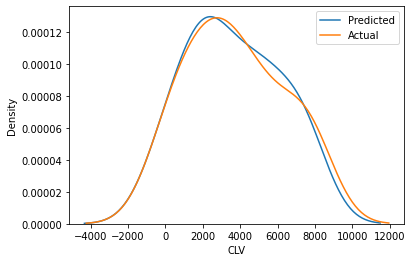

In [111]:
sns.kdeplot(y_lr_pred, label = 'Predicted')
sns.kdeplot(y_reg_test, label = 'Actual')
plt.legend()
plt.show()

In [112]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_reg_train, y_reg_train)

y_dtr_pred = dtr_model.predict(x_reg_test)

dtr_mse = mean_squared_error(y_reg_test, y_dtr_pred)
print('MSE: ', dtr_mse)

MSE:  8863722.5411043


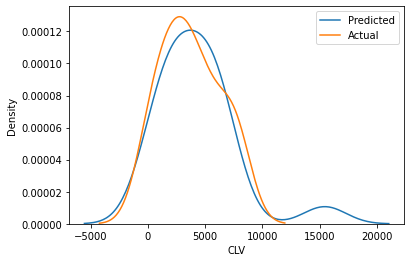

In [113]:
sns.kdeplot(y_dtr_pred, label = 'Predicted')
sns.kdeplot(y_reg_test, label = 'Actual')
plt.legend()
plt.show()

In [114]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_reg_train, y_reg_train)

y_rf_pred = rf_model.predict(x_reg_test)

rf_mse = mean_squared_error(y_reg_test, y_rf_pred)
print('MSE:', rf_mse)

MSE: 227583.65424776488


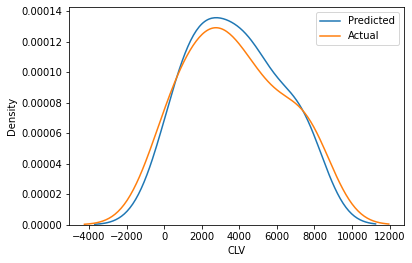

In [115]:
sns.kdeplot(y_rf_pred, label = 'Predicted')
sns.kdeplot(y_reg_test, label = 'Actual')
plt.legend()
plt.show()

# Classification ML models

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

lgr_model = LogisticRegression()
lgr_model.fit(x_class_train, y_class_train)

y_lgr_pred = lgr_model.predict(x_class_test)

accuracy_lgr = accuracy_score(y_class_test, y_lgr_pred)
print(accuracy_lgr*100,'%')

85.0 %


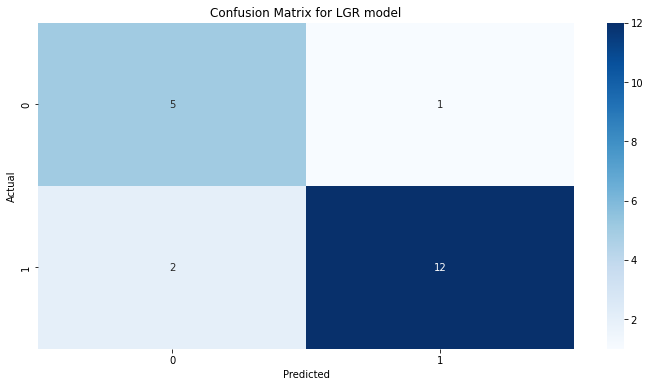

In [117]:
conf_matrix_lgr = confusion_matrix(y_class_test, y_lgr_pred)

plt.figure(figsize = (12, 6))
sns.heatmap(conf_matrix_lgr, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix for LGR model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [118]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_class_train, y_class_train)

y_dtc_pred = dtc_model.predict(x_class_test)

accuracy_dtc = accuracy_score(y_class_test, y_dtc_pred)
print(accuracy_dtc*100,'%')

65.0 %


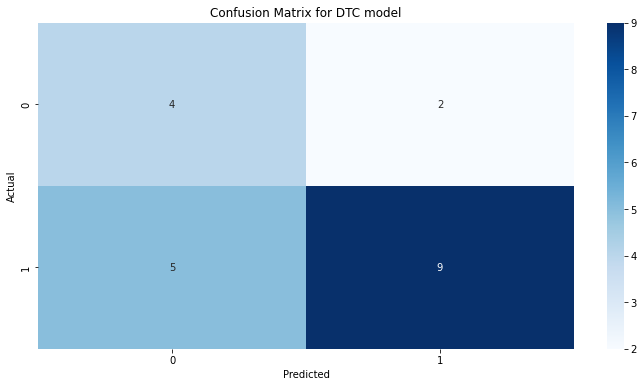

In [119]:
conf_matrix_dtc = confusion_matrix(y_class_test, y_dtc_pred)

plt.figure(figsize = (12, 6))
sns.heatmap(conf_matrix_dtc, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix for DTC model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [120]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
rfc_model.fit(x_class_train, y_class_train)

y_rfc_pred = rfc_model.predict(x_class_test)

accuracy_rfc = accuracy_score(y_class_test, y_rfc_pred)
print(accuracy_rfc*100,'%')

85.0 %


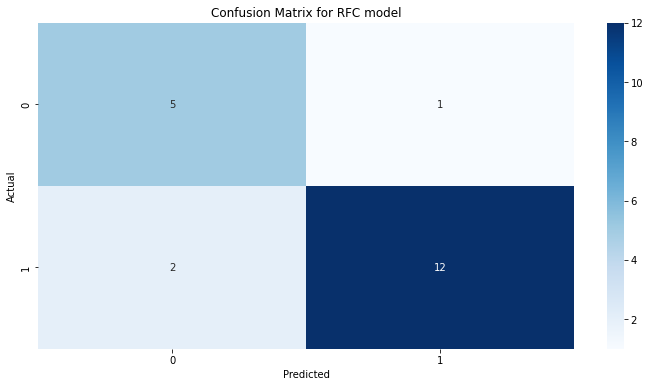

In [121]:
conf_matrix_rfc = confusion_matrix(y_class_test, y_rfc_pred)

plt.figure(figsize = (12, 6))
sns.heatmap(conf_matrix_rfc, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix for RFC model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cluster Analysis

In [122]:
from sklearn.cluster import KMeans

x = processed_data[['Recency', 'Frequency_Score', 'Monetary_Score']]

wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x)
    wcss_score = kmeans.inertia_
    wcss.append(wcss_score)

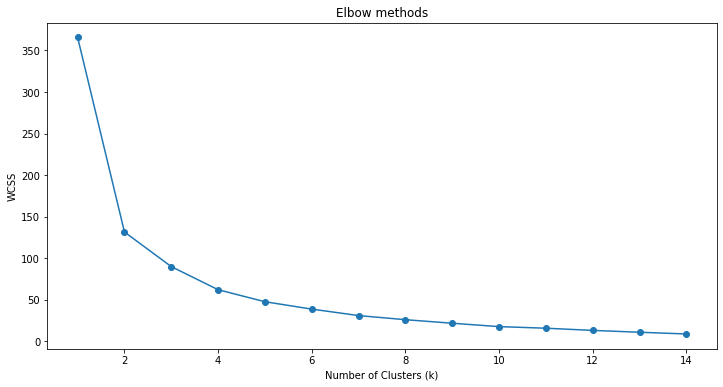

In [123]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, 15), wcss, marker = 'o')
plt.title('Elbow methods')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [124]:
final_km = KMeans(n_clusters = 2)
final_km.fit(x)

labels = final_km.labels_
labels

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int32)

In [125]:
processed_data['Clusters'] = labels
processed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,...,City_Chicago,City_Houston,City_Los Angeles,City_New York,Region_Midwest,Region_Northeast,Region_West,Purchase_Channel_In-store,Purchase_Channel_Online,Clusters
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,1,...,1,0,0,0,0,1,0,0,1,1
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,1,...,0,0,0,1,0,0,1,1,0,0
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,0,...,0,0,0,1,0,1,0,0,1,0
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,0,...,1,0,0,0,1,0,0,1,0,1
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,0,...,0,1,0,0,1,0,0,0,1,1


In [126]:
round(processed_data.groupby('Clusters')[['Recency', 'Frequency_Score', 'Monetary_Score']].mean(), 2)

,Recency,Frequency_Score,Monetary_Score
Clusters,,,
0,3.46,3.41,3.35
1,1.68,1.64,1.52


In [127]:
mapping = {0:'Regular customer', 1:'Loyal customer'}
processed_data['Customers_types'] = processed_data['Clusters'].map(mapping)

processed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,...,City_Houston,City_Los Angeles,City_New York,Region_Midwest,Region_Northeast,Region_West,Purchase_Channel_In-store,Purchase_Channel_Online,Clusters,Customers_types
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,1,...,0,0,0,0,1,0,0,1,1,Loyal customer
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,1,...,0,0,1,0,0,1,1,0,0,Regular customer
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,0,...,0,0,1,0,1,0,0,1,0,Regular customer
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,0,...,0,0,0,1,0,0,1,0,1,Loyal customer
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,0,...,1,0,0,1,0,0,0,1,1,Loyal customer
